In [36]:
import osmnx as ox # import necessary modules
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

In [37]:
%matplotlib inline

In [38]:
place_name = "Alsdorf, Südeifel, Eifelkreis Bitburg-Prüm, Rheinland-Pfalz, Deutschland " #https://nominatim.openstreetmap.org/ui/search.html

In [39]:
graph = ox.graph_from_place(place_name, simplify=True, network_type= 'all_private')

In [40]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [41]:
graph = ox.project_graph(graph)

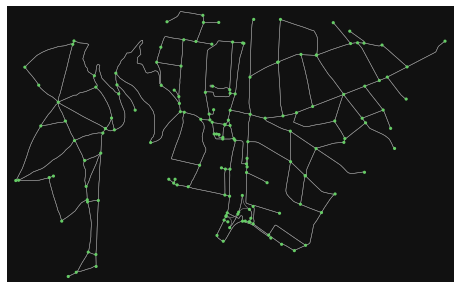

In [42]:
fig, ax = ox.plot_graph(graph, edge_linewidth=0.5, node_size=10, node_color="#66cc66") #Plot the graph nodes and edges

In [43]:
area = ox.geocode_to_gdf(place_name)# returns a GeoDataFrame based on the specified place name query

In [44]:
area.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((6.44148 49.89275, 6.44306 49.89162, ...",49.89833,49.875197,6.496006,6.441483,297762986,relation,1163504,49.888578,6.464316,"Alsdorf, Südeifel, Eifelkreis Bitburg-Prüm, Rh...",boundary,administrative,1.01577


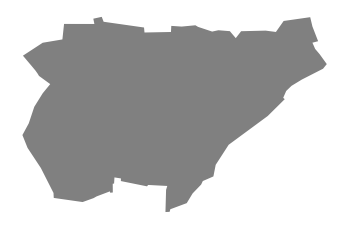

In [45]:
area_proj = ox.project_gdf(area)
ax = area_proj.plot (fc="grey", ec="none")

_ = ax.axis("off")

In [46]:

buildings = ox.geometries_from_place(place_name, tags={'building':True})

In [47]:
len(buildings) 

209

In [48]:
buildings.head()

nodes  \
element_type osmid                                                          
way          130739041  [1439102866, 1439102867, 1439102864, 143910286...   
             130741294  [1439125974, 1439126020, 1439126013, 143912596...   
             130741295  [1439125998, 1439126028, 1439126022, 143912606...   
             130741296  [1439125973, 1439126033, 1439126062, 143912605...   
             130741297  [1439126019, 1439126015, 1439125997, 143912596...   

                       addr:housenumber  addr:street building building:levels  \
element_type osmid                                                              
way          130739041                6  Hauptstraße    house               2   
             130741294               22  Hauptstraße    house             NaN   
             130741295                1     Im Brühl      yes             NaN   
             130741296                2     Im Brühl    house             NaN   
             130741297              NaN          NaN    house             NaN   

                       roof:levels          source  \
element_type osmid                                   
way          130739041           1  local_knowldge   
             130741294         NaN             NaN   
             130741295         NaN             NaN   
             130741296         NaN             NaN   
             130741297         NaN             NaN   

                                                                 geometry  \
element_type osmid                                                          
way          130739041  POLYGON ((6.46692 49.89277, 6.46692 49.89262, ...   
             130741294  POLYGON ((6.46674 49.89088, 6.46674 49.89074, ...   
             130741295  POLYGON ((6.46661 49.89056, 6.46658 49.89044, ...   
             130741296  POLYGON ((6.46608 49.89061, 6.46608 49.89043, ...   
             130741297  POLYGON ((6.46754 49.89285, 6.46753 49.89267, ...   

                       addr:postcode addr:city amenity name nohousenumber  \
element_type osmid                                                          
way          130739041           NaN       NaN     NaN  NaN           NaN   
             130741294         54668       NaN     NaN  NaN           NaN   
             130741295         54668       NaN     NaN  NaN           NaN   
             130741296         54668       NaN     NaN  NaN           NaN   
             130741297           NaN       NaN     NaN  NaN           NaN   

                       operator operator:wikidata operator:wikipedia  \
element_type osmid                                                     
way          130739041      NaN               NaN                NaN   
             130741294      NaN               NaN                NaN   
             130741295      NaN               NaN                NaN   
             130741296      NaN               NaN                NaN   
             130741297      NaN               NaN                NaN   

                       denomination religion service_times wikidata  
element_type osmid                                                   
way          130739041          NaN      NaN           NaN      NaN  
             130741294          NaN      NaN           NaN      NaN  
             130741295          NaN      NaN           NaN      NaN  
             130741296          NaN      NaN           NaN      NaN  
             130741297          NaN      NaN           NaN      NaN

In [49]:
buildings.columns

Index(['nodes', 'addr:housenumber', 'addr:street', 'building',
       'building:levels', 'roof:levels', 'source', 'geometry', 'addr:postcode',
       'addr:city', 'amenity', 'name', 'nohousenumber', 'operator',
       'operator:wikidata', 'operator:wikipedia', 'denomination', 'religion',
       'service_times', 'wikidata'],
      dtype='object')

In [50]:
# project to UTM
buildings_proj= ox.project_gdf(buildings)

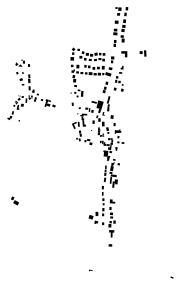

In [51]:
fig, ax = ox.plot_footprints(buildings_proj, figsize=(5, 5), color='black', bgcolor='w')
_ = ax.axis("off")

In [52]:
# Retrieve metro stop
stops = ox.geometries_from_place(place_name, tags={"station": "subway"})

In [53]:
# How many stops do we have?
len(stops)

0

In [54]:
stops.columns

Index(['geometry'], dtype='object')

In [ ]:
# # Select some useful columns and print
# stop_name = ['name', 'description', 'station']
        
# # Print
# stops[stop_name]

In [56]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [57]:
nodes.head()

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
36671865,5.528695e+06,318130.190297,3,6.468296,49.882995,NaN,POINT (318130.190 5528695.367)
9675444942,5.528556e+06,318099.561132,3,6.467935,49.881735,NaN,POINT (318099.561 5528556.232)
260728339,5.529407e+06,318028.407288,3,6.466545,49.889359,NaN,POINT (318028.407 5529407.090)
321460276,5.529544e+06,318070.227647,3,6.467063,49.890602,NaN,POINT (318070.228 5529544.021)
260728395,5.529373e+06,318195.386782,4,6.468884,49.889107,NaN,POINT (318195.387 5529373.341)


In [58]:
edges.head()

osmid  oneway   lanes    ref  \
u          v          key                                                    
36671865   9675444942 0    [1052812664, 1052812670]   False  [3, 2]  B 257   
9675444942 9675444931 0                   773737382    True       1    NaN   
           9675444963 0                  1052812668   False       4  B 257   
           36671865   0    [1052812664, 1052812670]   False  [3, 2]  B 257   
260728339  321460276  0                   139753842   False     NaN   K 94   

                                highway maxspeed reversed   length  \
u          v          key                                            
36671865   9675444942 0         primary      100    False  142.815   
9675444942 9675444931 0    primary_link      NaN    False  101.937   
           9675444963 0         primary      100    False   18.000   
           36671865   0         primary      100     True  142.815   
260728339  321460276  0        tertiary       50     True  143.106   

                                                                    geometry  \
u          v          key                                                      
36671865   9675444942 0    LINESTRING (318130.190 5528695.367, 318125.975...   
9675444942 9675444931 0    LINESTRING (318099.561 5528556.232, 318116.160...   
           9675444963 0    LINESTRING (318099.561 5528556.232, 318097.873...   
           36671865   0    LINESTRING (318099.561 5528556.232, 318104.649...   
260728339  321460276  0    LINESTRING (318028.407 5529407.090, 318070.228...   

                                  name tunnel bridge access service  
u          v          key                                            
36671865   9675444942 0            NaN    NaN    NaN    NaN     NaN  
9675444942 9675444931 0            NaN    NaN    NaN    NaN     NaN  
           9675444963 0            NaN    NaN    NaN    NaN     NaN  
           36671865   0            NaN    NaN    NaN    NaN     NaN  
260728339  321460276  0    Hauptstraße    NaN    NaN    NaN     NaN

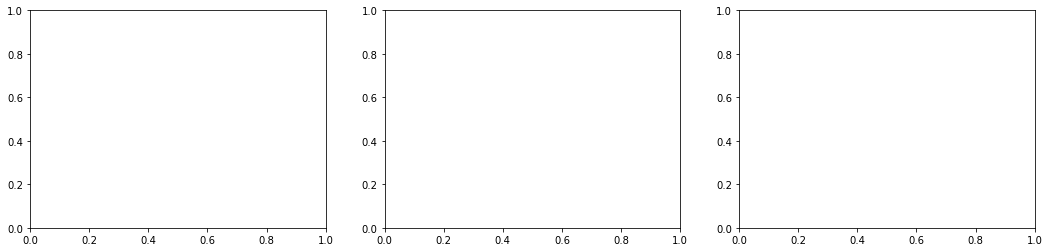

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

In [60]:
ax0, ax1, ax2 = ax

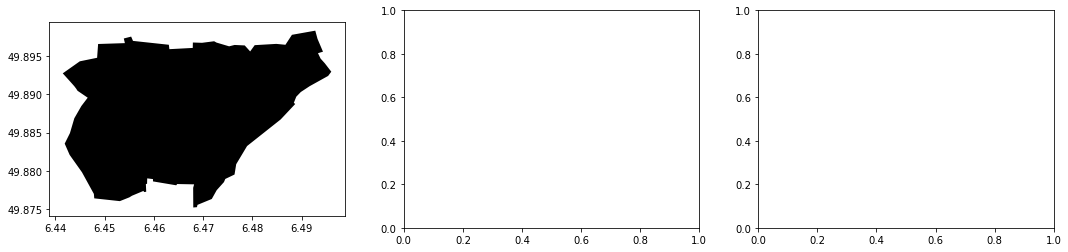

<Figure size 432x288 with 0 Axes>

In [61]:
# Plot the area
area.plot(ax=ax0, facecolor='black')
fig

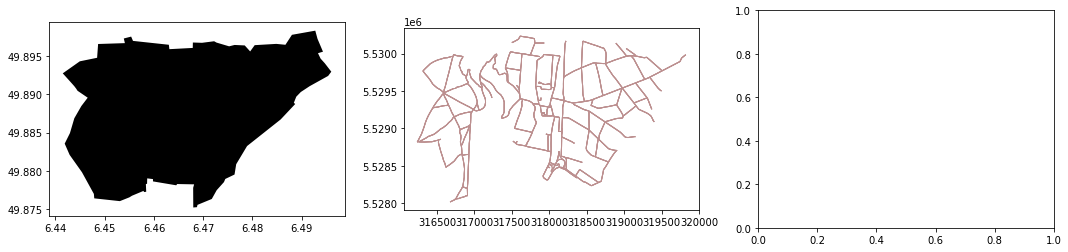

<Figure size 432x288 with 0 Axes>

In [63]:
edges.plot(ax=ax1 ,linewidth=1, edgecolor='#BC8F8F')
fig

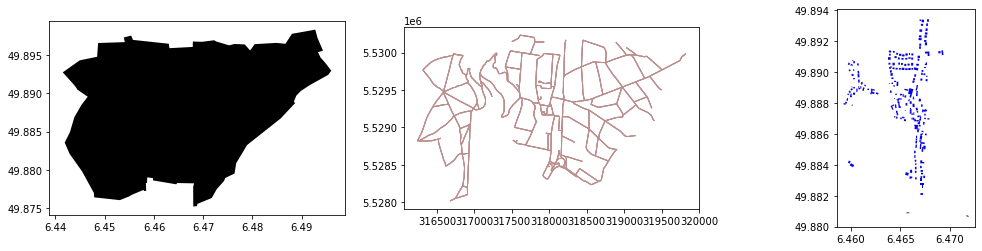

<Figure size 432x288 with 0 Axes>

In [65]:
# Plot the buildings
buildings.plot(ax=ax2, facecolor='blue')
fig

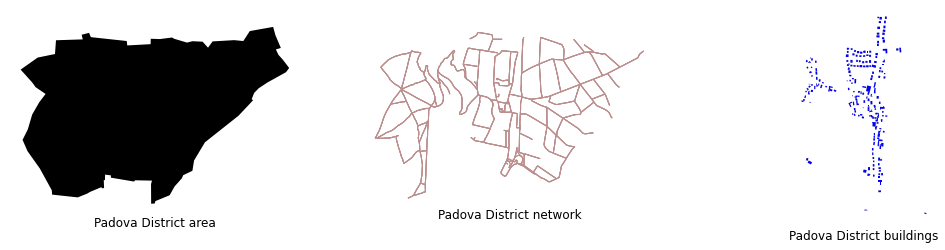

In [66]:
# Remove axis and add titles
ax0.axis('off')
ax0.set_title('Padova District area', y=-0.1)
ax1.axis('off')
ax1.set_title('Padova District network', y=-0.1)
ax2.axis('off')
ax2.set_title('Padova District buildings', y=-0.1)
fig

In [67]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(32632)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
stops = stops.to_crs(projection)

c:\Users\ozgur\anaconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


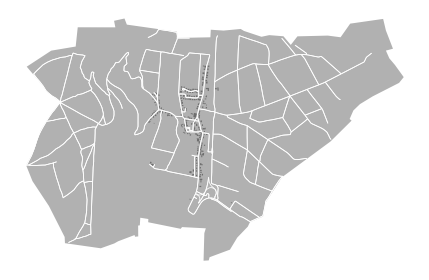

In [68]:
# Create a new plot with the re-projected layers overlapped:
fig, ax = plt.subplots(figsize=(18,4))

ax.axis('off')

# Plot the area
area.plot(ax=ax, facecolor='#b1b1b1')
# plot the network
edges.plot(ax=ax, linewidth=0.8, edgecolor='white')
# plot the buildings
buildings.plot(ax=ax, facecolor='#6e6e6e')
#plot the statio
stops.plot(ax=ax, color='red')
plt.tight_layout()

In [69]:
# save street network as geopackage to work with it in GIS
ox.save_graph_geopackage(graph, filepath="./data/ graph.gpkg") 

In [70]:
# save the buildings, area, and stops as a geopackage to work in GIS
buildings.geometry.to_file("./data/Alsdorf.gpkg", driver='GPKG', layer='buildings')
area.geometry.to_file("./data/Alsdorf.gpkg", driver='GPKG', layer='area')
stops.geometry.to_file("./data/Alsdorf.gpkg", driver='GPKG', layer='stops')

c:\Users\ozgur\anaconda3\envs\geo_env\lib\site-packages\geopandas\io\file.py:518: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
